# Titanic Outcompte
$Fonte:$ https://www.youtube.com/watch?v=j4XvJEbaVJg

## Importações

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
train_df = pd.read_csv("train.csv", sep=",")
test_df = pd.read_csv("test.csv", sep=",")

In [112]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

## Analise da Base

In [113]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


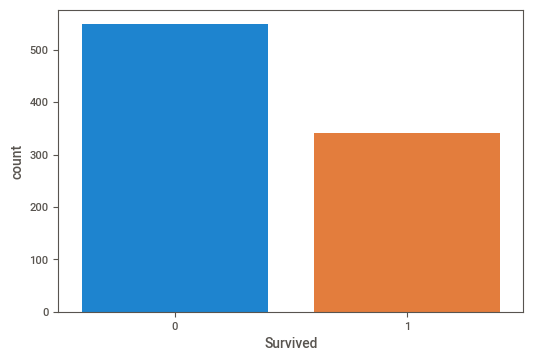

In [114]:
sns.countplot(x='Survived', data=train_df);

<AxesSubplot:xlabel='Survived', ylabel='count'>

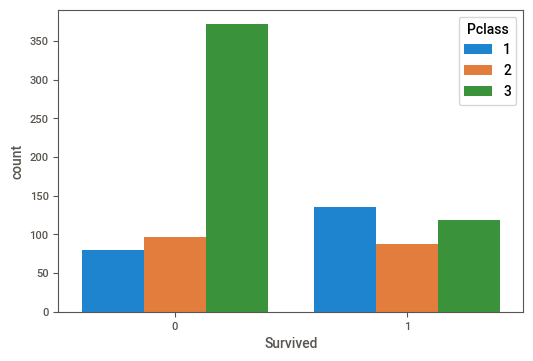

In [115]:
sns.countplot(x='Survived', data=train_df, hue="Pclass")

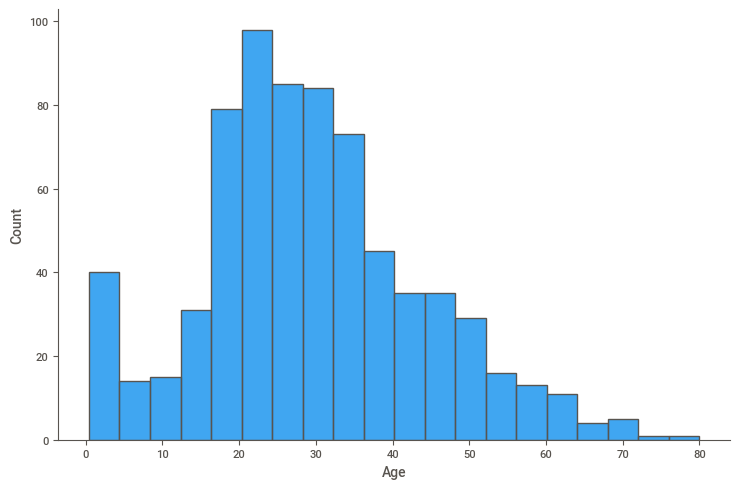

In [116]:
sns.displot(train_df['Age'],kde= False, aspect=1.5)

In [117]:
import sweetviz as sv

In [9]:
report = sv.analyze(train_df,target_feat='Survived')

report.show_html("./report_titanic.html")

                                             |                                             | [  0%]   00:00 ->…

Report ./report_titanic.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Trantando Missing

In [118]:
print(train_df.info())
print('--------------')
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    i

In [119]:
print(train_df.isnull().sum())
print("\n")      
print(test_df.isnull().sum()) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

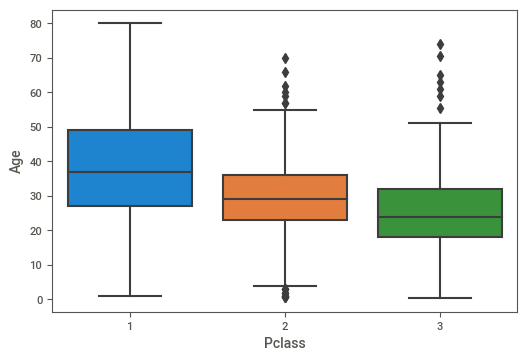

In [120]:
sns.boxplot(x="Pclass", y="Age", data=train_df)

### Completando feature "Age"
Usando a média das idades por tipo de classe

In [13]:
print(train_df[train_df['Pclass']==1]['Age'].mean())
print(train_df[train_df['Pclass']==2]['Age'].mean())
print(train_df[train_df['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [121]:
print(test_df[train_df['Pclass']==1]['Age'].mean())
print(test_df[train_df['Pclass']==2]['Age'].mean())
print(test_df[train_df['Pclass']==3]['Age'].mean())

30.328961038961037
32.14393939393939
29.596137566137568


C:\Users\ANSELM~1\AppData\Local\Temp/ipykernel_13936/2720123403.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(test_df[train_df['Pclass']==1]['Age'].mean())
C:\Users\ANSELM~1\AppData\Local\Temp/ipykernel_13936/2720123403.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(test_df[train_df['Pclass']==2]['Age'].mean())
C:\Users\ANSELM~1\AppData\Local\Temp/ipykernel_13936/2720123403.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(test_df[train_df['Pclass']==3]['Age'].mean())


In [14]:
#mean_age_pcla1 = round(train_df[train_df['Pclass']==1]['Age'].mean())
#mean_age_pcla2 = round(train_df[train_df['Pclass']==2]['Age'].mean())
#mean_age_pcla3 = round(train_df[train_df['Pclass']==3]['Age'].mean())

In [122]:
train_df['Age'].fillna(-1, inplace= True)

In [123]:
test_df['Age'].fillna(-1, inplace= True)

In [124]:
def fill_in_na_values_train(cols):
    age = cols[0]
    pclass = cols[1]
    
    if (age==-1):
        if pclass == 1:
            return round(train_df[train_df['Pclass']==1]['Age'].mean())
        elif pclass == 2:
            return round(train_df[train_df['Pclass']==2]['Age'].mean())
        elif pclass == 3:
            return round(train_df[train_df['Pclass']==3]['Age'].mean())
    else:
        return age
        
train_df['Age'] = train_df[['Age', 'Pclass']].apply(fill_in_na_values, axis=1)

In [125]:
def fill_in_na_values_test(cols):
    age = cols[0]
    pclass = cols[1]
    
    if (age==-1):
        if pclass == 1:
            return round(test_df[train_df['Pclass']==1]['Age'].mean())
        elif pclass == 2:
            return round(test_df[train_df['Pclass']==2]['Age'].mean())
        elif pclass == 3:
            return round(test_df[train_df['Pclass']==3]['Age'].mean())
    else:
        return age
        
test_df['Age'] = test_df[['Age', 'Pclass']].apply(fill_in_na_values, axis=1)

In [126]:
print(train_df.isnull().sum())
print("\n")      
print(test_df.isnull().sum()) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<AxesSubplot:>

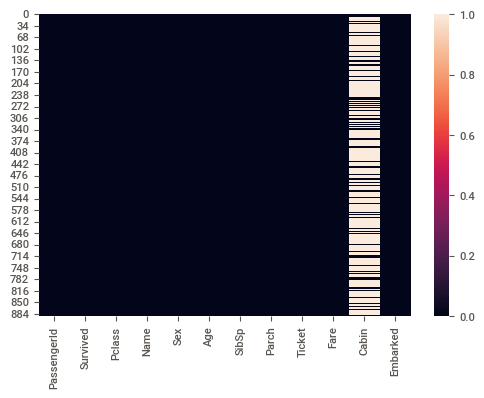

In [18]:
sns.heatmap(train_df.isnull(), )

In [128]:
test_df['Fare'].fillna(method='ffill', inplace=True)

In [134]:
train_df['Embarked'].fillna(method='ffill', inplace=True)

In [135]:
print(train_df.isnull().sum())
print("\n")      
print(test_df.isnull().sum()) 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Eliminando cabin porque não tem relevancia no modelo e possui muitos nulos

### Tratando colunas com poucos NaN
Embarked só possui 02 linhas nulas então vamos deleta-la

In [131]:

train_df.drop(['Cabin'], axis=1, inplace=True),test_df.drop(['Cabin'], axis=1, inplace=True)

KeyError: "['Cabin'] not found in axis"

In [138]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [137]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [22]:
train_df.dropna(inplace=True)

In [23]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Deletando

vamos deletar PassagerId, name e Ticket, porque não possuem muita correlação com target

In [24]:
train_df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [25]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Converter Dummies()
Convertendo dados tipos string para numéricos
Sex e Embarked

In [26]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [27]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
sex = pd.get_dummies(train_df['Sex'], drop_first=True)

In [29]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [30]:
embarked = pd.get_dummies(train_df['Embarked'], drop_first=True)

In [31]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [32]:
train_df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [33]:
train_df = pd.concat([train_df, sex, embarked], axis=1)

In [34]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Prepocessamento

In [35]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=42)

In [36]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [37]:
from sklearn.preprocessing import MinMaxScaler

cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=cols)

In [38]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,0.220910,0.0,0.0,0.015713,1.0,0.0,1.0
1,1.0,0.384267,0.0,0.0,0.015469,1.0,0.0,1.0
2,1.0,0.271174,0.0,0.0,0.019202,0.0,0.0,1.0
3,1.0,0.271174,0.0,0.0,0.014151,1.0,0.0,1.0
4,1.0,0.409399,0.0,0.0,0.015176,1.0,0.0,1.0


## Modelo SVM

### Ajustando e treinando modelo

In [39]:
from sklearn.svm import SVC

modelo_svm = SVC()
modelo_svm.fit(X_train, y_train)


SVC()

In [40]:
y_predito = modelo_svm.predict(X_test)

### validando modelo

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predito))
print(confusion_matrix(y_test, y_predito))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        58
           1       0.85      0.71      0.77        31

    accuracy                           0.85        89
   macro avg       0.85      0.82      0.83        89
weighted avg       0.85      0.85      0.85        89

[[54  4]
 [ 9 22]]


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.5,1,10, 50, 100, 1000 ], 'gamma':[1,0.1,0.001, 0.0001, 0.00001, 0.000001]}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=True )

grid.fit(X_train, y_train)
grid_predito = grid.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [43]:
print(classification_report(y_test, grid_predito))
print(confusion_matrix(y_test, grid_predito))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        58
           1       0.79      0.74      0.77        31

    accuracy                           0.84        89
   macro avg       0.83      0.82      0.82        89
weighted avg       0.84      0.84      0.84        89

[[52  6]
 [ 8 23]]


In [44]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression()

modelo_lr.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_predito_lr = modelo_lr.predict(X_test)

print(classification_report(y_test, y_predito_lr))
print(confusion_matrix(y_test, y_predito_lr))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        58
           1       0.85      0.74      0.79        31

    accuracy                           0.87        89
   macro avg       0.86      0.84      0.85        89
weighted avg       0.86      0.87      0.86        89

[[54  4]
 [ 8 23]]


## Neigbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
# treinado e descobrindo o melhor valor de "n_nwighbors"

error_list = []

for i in range(1,40):
    modelo_knn = KNeighborsClassifier(n_neighbors=i)
    modelo_knn.fit(X_train, y_train)
    y_predito_knn = modelo_knn.predict(X_test)
    error_list.append(np.mean(y_predito_knn != y_test))

In [80]:
print(classification_report(y_test, y_predito_knn))
print(confusion_matrix(y_test, y_predito_knn))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        58
           1       0.85      0.71      0.77        31

    accuracy                           0.85        89
   macro avg       0.85      0.82      0.83        89
weighted avg       0.85      0.85      0.85        89

[[54  4]
 [ 9 22]]


In [71]:
error_list

[0.30337078651685395,
 0.25842696629213485,
 0.23595505617977527,
 0.2247191011235955,
 0.21348314606741572,
 0.21348314606741572,
 0.1797752808988764,
 0.21348314606741572,
 0.1797752808988764,
 0.16853932584269662,
 0.16853932584269662,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.14606741573033707,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.16853932584269662,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.15730337078651685,
 0.14606741573033707,
 0.14606741573033707]

15

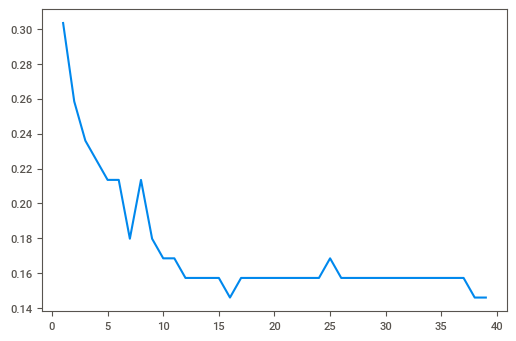

In [83]:
plt.plot(range(1,40,), error_list)
np.argmin(error_list) #melhor valor de n+neighbors

In [67]:
print(classification_report(y_test, y_predito_knn))
print(confusion_matrix(y_test, y_predito_knn))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        58
           1       0.75      0.58      0.65        31

    accuracy                           0.79        89
   macro avg       0.78      0.74      0.75        89
weighted avg       0.78      0.79      0.78        89

[[52  6]
 [13 18]]


In [79]:
error_list[15]

0.14606741573033707

In [81]:
modelo_knn = KNeighborsClassifier(n_neighbors=15)

modelo_knn.fit(X_train, y_train)
y_predito_knn = modelo_knn.predict(X_test)

In [82]:
print(classification_report(y_test, y_predito_knn))
print(confusion_matrix(y_test, y_predito_knn))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        58
           1       0.81      0.71      0.76        31

    accuracy                           0.84        89
   macro avg       0.83      0.81      0.82        89
weighted avg       0.84      0.84      0.84        89

[[53  5]
 [ 9 22]]


## Árvore de decisão e RandomForest

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [93]:
#ajustando modelo
modelo_dt = DecisionTreeClassifier()
modelo_rfc = RandomForestClassifier(n_estimators=25)

# Trainando o modelo
modelo_dt.fit(X_train, y_train)
modelo_rfc.fit(X_train, y_train)

# prvendo y
y_predito_dt = modelo_dt.predict(X_test)
y_predito_rfc = modelo_rfc.predict(X_test)

In [94]:
print(classification_report(y_test, y_predito_dt))
print(confusion_matrix(y_test, y_predito_dt))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        58
           1       0.70      0.52      0.59        31

    accuracy                           0.75        89
   macro avg       0.73      0.70      0.71        89
weighted avg       0.75      0.75      0.74        89

[[51  7]
 [15 16]]


In [95]:
print(classification_report(y_test, y_predito_rfc))
print(confusion_matrix(y_test, y_predito_rfc))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        58
           1       0.69      0.58      0.63        31

    accuracy                           0.76        89
   macro avg       0.74      0.72      0.73        89
weighted avg       0.76      0.76      0.76        89

[[50  8]
 [13 18]]


In [96]:
y_predito_lr

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0], dtype=int64)

In [100]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,0.448276,0.0,0.0,0.001740,1.0,0.0,1.0
1,0.0,0.206897,0.2,0.5,0.223655,0.0,0.0,1.0
2,1.0,0.206897,0.2,0.0,0.008443,0.0,0.0,0.0
3,0.5,0.482759,0.0,0.0,0.011922,1.0,0.0,1.0
4,0.0,0.275862,0.0,0.5,0.143810,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
84,0.5,0.551724,0.2,0.0,0.027753,1.0,0.0,1.0
85,1.0,0.275862,0.0,0.0,0.001534,1.0,1.0,0.0
86,1.0,0.689655,0.0,0.0,0.001138,1.0,0.0,1.0
87,0.5,0.362069,0.0,0.0,0.011922,1.0,0.0,1.0


In [102]:
test_df.shape

(418, 11)